In [1]:
%matplotlib inline
import numpy
import pandas
import matplotlib.pyplot as plt

import os, sys
sys.path.append('../code')

# Generate events

In [2]:
from utils import straight_tracks_generator
events = straight_tracks_generator(n_events=10, n_tracks=1, n_noise=0, sigma=1.5, intersection=False, x_range=(0, 10, 0.1))

# Tracks Recognition

In [3]:
event = events[events.EventID == 0]
X = event.X.values
y = event.y.values

In [4]:
from KalmanFilter import LinearKalmanFilter

transition_covariance= 0.000000001* numpy.eye(2)
observation_covariance = 0.0001* numpy.eye(1)
initial_state_covariance = 0.000001 * numpy.eye(2)


kf = LinearKalmanFilter(window=40, 
                               min_hits=4, 
                               transition_covariance=transition_covariance, 
                               observation_covariance=observation_covariance)
kf.fit(X,y)

labels = kf.labels_
predictions = kf.predictions_
matrices = kf.matrices_

In [7]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X.reshape(-1, 1), y)

true_k = lr.coef_[0]
true_b = lr.intercept_

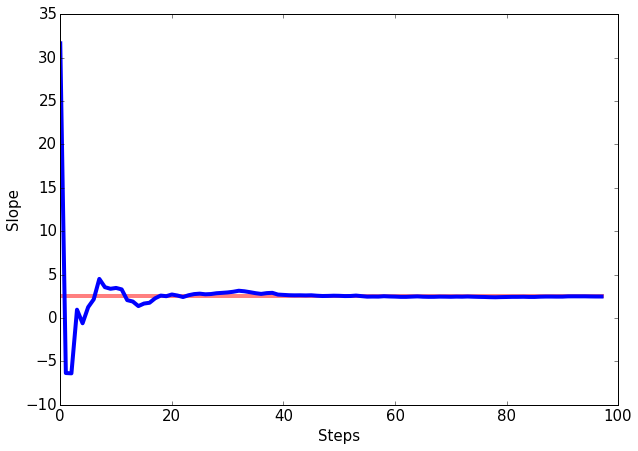

In [8]:
states = matrices[0]['state']
ks = [st[0,0] for st in states]
bs = [st[1,0] for st in states]
steps = range(len(ks))

plt.figure(figsize=(10, 7))
plt.plot(steps, [true_k]*len(steps), color='r', linewidth=4, alpha=0.5)
plt.plot(steps, ks, linewidth=4)
plt.xlabel('Steps', size=15)
plt.ylabel('Slope', size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

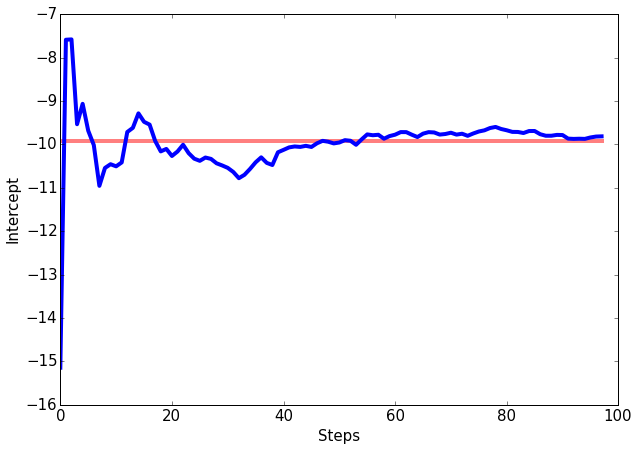

In [9]:
plt.figure(figsize=(10, 7))
plt.plot(steps, [true_b]*len(steps), color='r', linewidth=4, alpha=0.5)
plt.plot(steps, bs, linewidth=4)
plt.xlabel('Steps', size=15)
plt.ylabel('Intercept', size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

# Plot True and Recognized Tracks

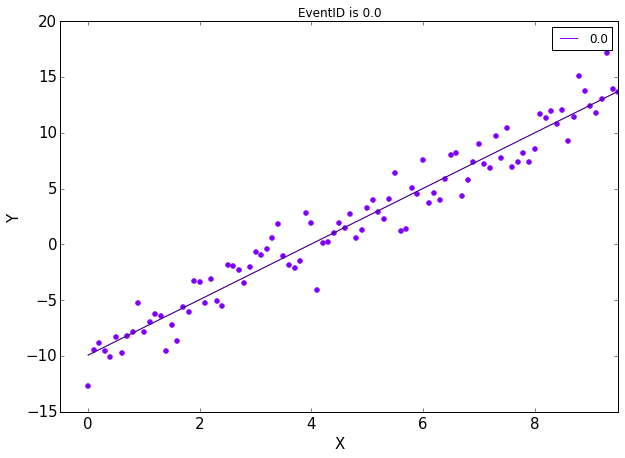

In [10]:
from utils import plot_straight_tracks
plot_straight_tracks(event, labels)
plt.xlim(-0.5, 9.5)
plt.ylabel('Y', size=15)
plt.xlabel('X', size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

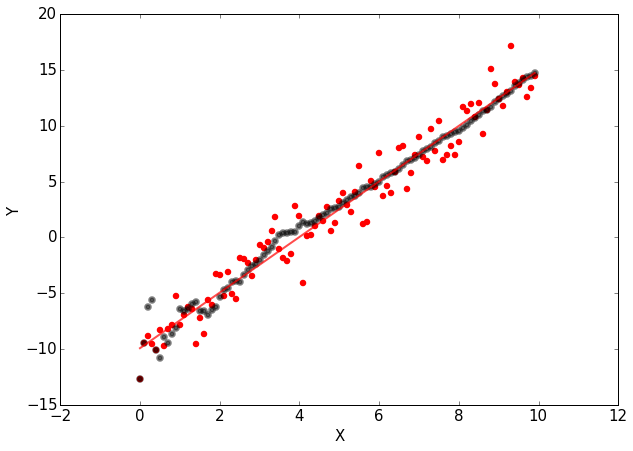

In [14]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X.reshape(-1, 1)[:-1], y[:-1])


plt.figure(figsize=(10,7))

plt.scatter(X,y, color='r', linewidths=2)
plt.plot(X, lr.predict(X.reshape(-1,1)), color='r', linewidth=2, alpha=0.7)

    
plt.scatter(X, predictions, color='0.', alpha=0.5, linewidth=3)

#plt.xlim(-0.5, 10.5)
#plt.ylim(-7, 15)
plt.xlabel('X', size=15)
plt.ylabel('Y', size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()